This code compares the behavior of animal groups before, during and after drone exchanges. We have scored each group's behavioral state during the two minutes prior to the drone exchange (the two minutes preceding the launch of the replacement drone), during the drone exchange (the time during which two drones are in flight), and the two minutes after the drone exchange (the two minutes after the replaced drone lands).

In [1]:
# import packages
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns
import numpy as np

In [17]:
# load data
df = pd.read_csv('data/exchanges_clean.csv')
df['group_behavior'] = df['group_behavior'].astype('object')

# reshape data
df2 = df.drop(['observation','start_flight', 'start_timestamp', 'end_flight', 'end_timestamp'], axis = 1)
df_new = df2.pivot(index = ['exchange_num','species'], columns = 'clip_type', values='group_behavior')
df_new.dropna(inplace = True)
df_new.reset_index(inplace=True)  
df_new.index.rename('index', inplace = True)
df_new

clip_type,exchange_num,species,exchange,post,pre
index,,,,,
0,ob025-1,pz,0,0,0
1,ob029-1,imp,1,1,1
2,ob031-1,imp,1,1,0
3,ob033-1,pz,0,0,2
4,ob039-1,imp,0,0,0
...,...,...,...,...,...
58,ob114-1,pz,0,0,0
59,ob114-2,gz,0,0,0
60,ob114-2,imp,0,0,0


In [18]:
# Pratt zero method is more robust for ordinal data. Do two-tailed tests.

# Compare behavior before exchange to behavior during exchange
r1 = wilcoxon(df_new['pre'], df_new['exchange'], zero_method = 'pratt')
# Compare behavior during exchange to behavior after exchange
r2 = wilcoxon(df_new['exchange'], df_new['post'], zero_method = 'pratt')
# Compare behavior before exchange to after exchange
r3 = wilcoxon(df_new['pre'], df_new['post'], zero_method = 'pratt')

# print results in table
pd.DataFrame(np.array([r1, r2, r3]), columns = ['W-statistic', 'p-value'], 
             index = ['before vs during', 'during vs after', 'before vs after'])

,W-statistic,p-value
before vs during,336.0,0.928090
during vs after,241.5,0.786397
before vs after,382.0,0.726551


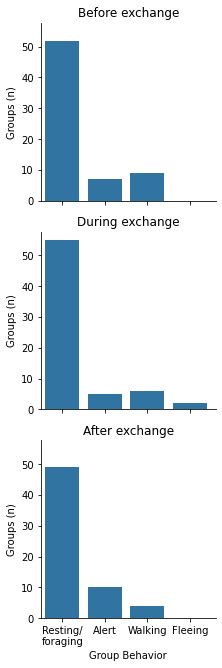

In [4]:
g = sns.FacetGrid(df, row = 'clip_type', row_order = ['pre', 'exchange', 'post'])
g.map_dataframe(sns.countplot, x="group_behavior")
g.set(xticks = [0,1,2,3], xlim=[-0.5,3.6])
g.set_axis_labels("Group Behavior", "Groups (n)")
g.set_xticklabels(['Resting/\nforaging', 'Alert', 'Walking', 'Fleeing'])
for ax, title in zip(g.axes.flat, ['Before exchange', 'During exchange', 'After exchange']):
    ax.set_title(title)

Alternative visualization, showing each datapoint color-coded by species:

In [4]:
# # Create a version of the behavior scores in which each score has a small value added to it. This will allow the
# # data points to be jittered in a swarm plot so that all points can be displayed.
# df['jittered_scores'] = (np.random.randint(-250,250,len(df))/1000) + df['group_behavior']

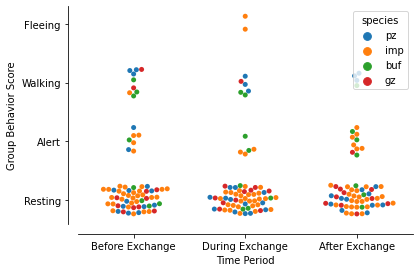

In [7]:
# #ax = sns.violinplot(x = 'clip_type', y = 'group_behavior', data = df, order = ['pre', 'exchange', 'post'])
# #ax = sns.swarmplot(x = 'clip_type', y = 'jittered_scores', data = df, order = ['pre', 'exchange', 'post'], color = '0.2')
# ax = sns.swarmplot(x = 'clip_type', y = 'jittered_scores', hue = 'species', data = df, order = ['pre', 'exchange', 'post'])
# ax.set(xlabel='Time Period', ylabel='Group Behavior Score', yticks = [0,1,2,3], xticklabels = ['Before Exchange', 'During Exchange', 'After Exchange'],
#       yticklabels = ['Resting', 'Alert', 'Walking', "Fleeing"])
# sns.despine(offset = 10)